In [19]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

**1.** Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [20]:
X, y, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [21]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j])/stds[j]

In [22]:
def mserror(X, w, y_pred, alpha):
    y = X.dot(w)
    return ((sum((y - y_pred)**2)) / len(y)) + (alpha * np.sum(np.square(w)))

In [23]:
alpha = 0

In [24]:


def gradient(X, y):
    # инициализируем начальный вектор весов
    w = np.zeros(2)

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # шаг градиентного спуска
    eta = 0.01

    # максимальное число итераций
    max_iter = 1e4

    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0
    
   
    
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X, new_w, y, alpha))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)
    
    return errors, w_list

errors, w_list = gradient(X, y)
    
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 38.5683


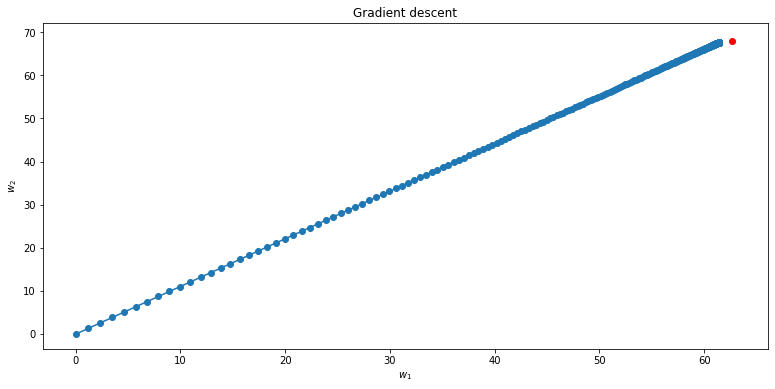

In [25]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

In [28]:
def stohastic(X, y):
    # инициализируем начальный вектор весов
    w = np.zeros(2)

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # шаг градиентного спуска
    eta = 0.01

    # максимальное число итераций
    max_iter = 1e5

    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    np.random.seed(1234)

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0])

        new_w = w - 2 * eta * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X, new_w, y, alpha))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)
    
    return errors, w_list

errors_s, w_list_s = stohastic(X, y)
    
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_s[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 248.3494


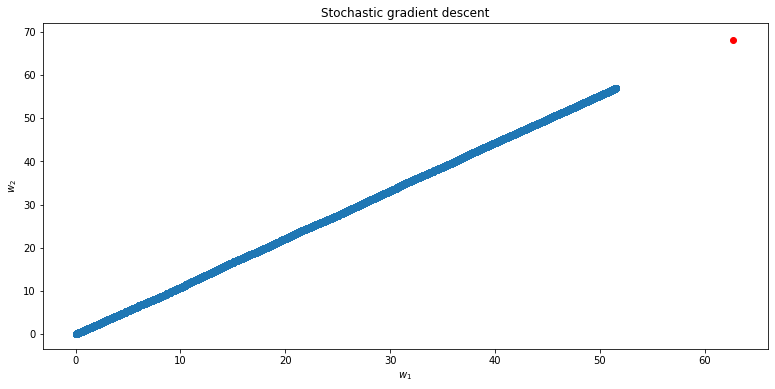

In [27]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_s[:, 0], w_list_s[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list_s[:, 0], w_list_s[:, 1])

plt.show()

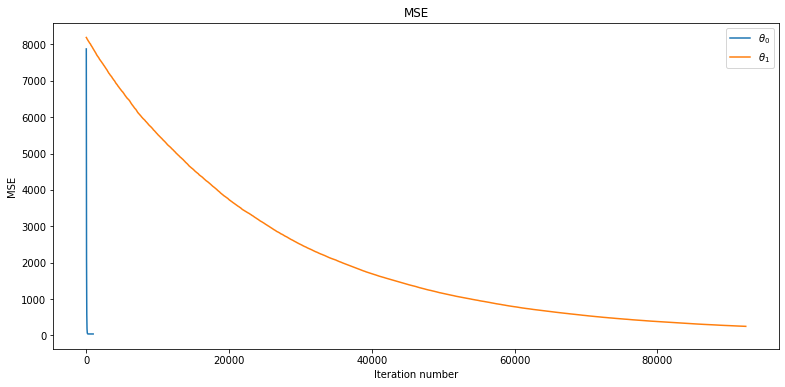

In [10]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors, label=r'$\theta_0$')
plt.plot(range(len(errors_s)), errors_s, label=r'$\theta_1$')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc="best")

**2.** Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [11]:
alpha = 0.0001

In [12]:
errors, w_list = gradient(X, y)
    
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 39.4036


In [13]:
errors_s, w_list_s = stohastic(X, y)
    
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_s[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 248.9382


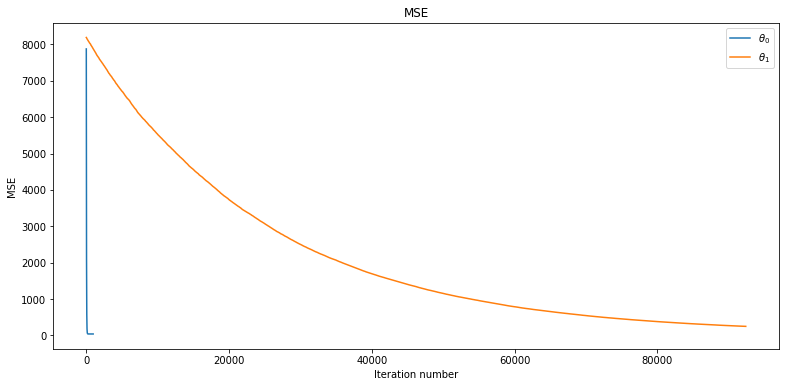

In [14]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors, label=r'$\theta_0$')
plt.plot(range(len(errors_s)), errors_s, label=r'$\theta_1$')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc="best")

**3 [опция].** Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [15]:
def mserror(X, w, y_pred, alpha):
    y = X.dot(w)
    return ((sum((y - y_pred)**2)) / len(y)) + (alpha * np.sum(np.fabs(w)))

In [16]:
errors, w_list = gradient(X, y)
    
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 38.5812


In [17]:
errors_s, w_list_s = stohastic(X, y)
    
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_s[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 248.3603


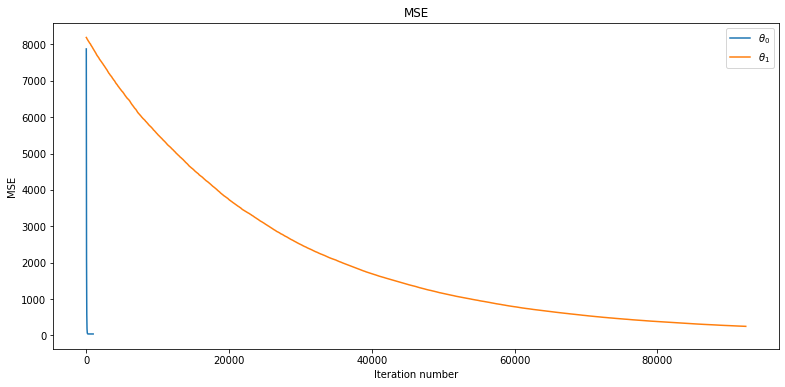

In [18]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors, label=r'$\theta_0$')
plt.plot(range(len(errors_s)), errors_s, label=r'$\theta_1$')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc="best")